In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import seaborn as sns
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Specify the path to the dataset WinRAR zip file
dataset_zip_path = "/content/drive/MyDrive/dataset.zip"

In [6]:
# Extract the zip file
import zipfile
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/fake_news_dataset")

In [7]:
# Step 5: Load the CSV files into pandas dataframes
fake_news_df = pd.read_csv("/content/fake_news_dataset/Fake.csv")
real_news_df = pd.read_csv("/content/fake_news_dataset/Real.csv")

In [8]:
# Visualize the first few rows of each dataframe of Fakes news
print("Fake News Data:")
print(fake_news_df.head(5))

Fake News Data:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [9]:
# Visualize the first few rows of each dataframe of Real news
print("\nReal News Data:")
print(real_news_df.head(5))


Real News Data:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'News'),
  Text(1, 0, 'politics'),
  Text(2, 0, 'Government News'),
  Text(3, 0, 'left-news'),
  Text(4, 0, 'US_News'),
  Text(5, 0, 'Middle-east')])

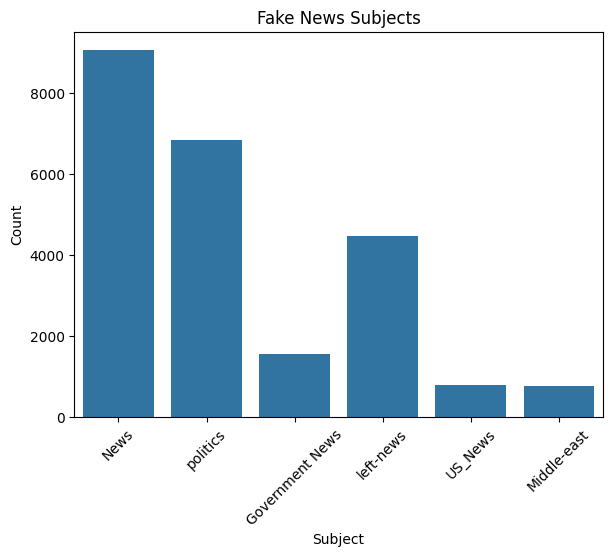

In [10]:
# Visualize the distribution of labels of Fake News Subjects
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=fake_news_df, x='subject')
plt.title('Fake News Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'politicsNews'), Text(1, 0, 'worldnews')])

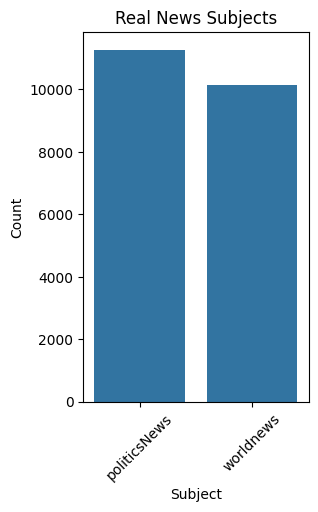

In [11]:
# Visualize the distribution of labels of Real News Subjects
plt.subplot(1, 2, 2)
sns.countplot(data=real_news_df, x='subject')
plt.title('Real News Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)

In [12]:
# Data cleaning and preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [13]:
fake_news_df['clean_text'] = fake_news_df['text'].apply(preprocess_text)
real_news_df['clean_text'] = real_news_df['text'].apply(preprocess_text)

In [14]:
# Split the dataset into training and testing sets

X_fake = fake_news_df['clean_text']
y_fake = np.zeros(X_fake.shape[0])  # Label 0 for fake news

X_real = real_news_df['clean_text']
y_real = np.ones(X_real.shape[0])   # Label 1 for real news

X = pd.concat([X_fake, X_real], axis=0)
y = np.concatenate([y_fake, y_real], axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [22]:
# Model training using Passive-Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=100)

In [23]:
model.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=100)

In [17]:
# Evaluation
from sklearn.metrics import classification_report

y_pred = model.predict(tfidf_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4733
         1.0       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [25]:
# Load the CSV file containing random data
random_data = pd.read_csv('/content/fake_news_dataset/Real.csv')

# Assuming 'text' column contains the text data to be predicted
random_text = random_data['text']

# Transform the preprocessed text data using the TF-IDF vectorizer
tfidf_random_text = tfidf_vectorizer.transform(random_text)

# Use the trained model to make predictions on the transformed data
predictions = model.predict(tfidf_random_text)

# Display each random chosen text and its corresponding prediction
for text, prediction in zip(random_text, predictions):
    print("Random Chosen Text:", text)
    print("Prediction:", "Fake" if prediction == 0 else "Real")
    print()

Random Chosen Text: WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Prediction: Real

Random Chosen Text: WASHINGTON (Reuters) - The U.S. Congress, bitterly divided for years along party lines, may be mapping a bipartisan path forward that skirts around President Donald Trump when he refuses to engage constructively with lawmakers, Democrats and some lobbyists said on Monday. The path was discernible in a nearly $1.2 trillion federal spending deal carved out over the weekend to avert a government shutdown. It had Democratic fingerprints all over it, even though Republicans control Congress and the White House.  White House budget director Mick Mulvaney said Trump will sign the 2017 budget bill when he receives it from Congress on Thursday or Friday. Trump, in an interview with Bloomberg on Monday, said he was “very happy” with the deal announced late on Sunday. Democrats claimed victory on issue after issue in the agreement, which will keep the lights on in Washington through the end of  the federal fiscal year on Sept. 30, provided it holds up and win

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Prediction: Real

Random Chosen Text: WASHINGTON (Reuters) - U.S. Senate Democrats delayed the Senate Finance Committee’s vote on U.S. Treasury secretary nominee Steven Mnuchin on Monday so they could protest against President Donald Trump’s order banning travel from seven Muslim-majority nations. The panel will now vote on Mnuchin’s nomination on Tuesday at 10 a.m. EST (1500 GMT), Finance Committee Republican spokeswoman Julia Lawless said, calling Democrats’ objections to the scheduled Monday evening vote “irregular.” Senate Democratic Leader Chuck Schumer organized a candlelight protest on the steps of the Capitol to take place on Monday evening.  “This delay will allow members to protest the president’s unconstitutional ban on Muslims entering the United States while voting on Mr. Mnuchin’s nomination little more than 12 hours later,” said Rachel McCleery, a spokesperson for Senate Finance Committee Democrats. The move also could buy more time for some senators to reconsider their 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



MOSCOW (Reuters) - Russia is ready to consider easing an arms embargo for Libya, the Interfax news agency cited Russian Deputy Foreign Minister Gennady Gatilov as saying on Wednesday. Libyan Prime Minister Fayez al-Sarraj said this month he was hopeful that a U.N.-imposed arms embargo would be partially lifted against some branches of the country s military. The Libyan government is allowed to import weapons and related materiel with the approval of a U.N. Security Council committee overseeing the embargo imposed in 2011. 
Prediction: Real

Random Chosen Text: PYEONGCHANG, South Korea (Reuters) - Set to host the Winter Olympics in February, South Korea conducted a series of security drills on Tuesday to prepare against terror attacks ranging from a hostage situation, a vehicle ramming a stadium and a bomb-attached to a drone. Police and firemen were among around 420 personnel participating in the exercise, held in front of the Olympic Stadium at Pyeongchang, just 80 km (50 miles) from 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



NAIROBI (Reuters) - Two people were shot dead on Friday as Kenyan police tried to disperse opposition supporters marching from an airport alongside the convoy of opposition leader Raila Odinga, a Reuters witness said. 
Prediction: Real

Random Chosen Text: MOSCOW (Reuters) - President Vladimir Putin signed a decree on Thursday which said Russia s armed forces numbered just over 1.9 million people, including over 1 million military servicemen. The TASS news agency said the new decree replaced an older one from 2016 which had put the total number of personnel in the armed forces at around 1.8 million. 
Prediction: Real

Random Chosen Text: LONDON (Reuters) - British foreign minister Boris Johnson said on Friday it was  appalling  that Russia had blocked a U.S.-drafted resolution to renew an international inquiry into who is to blame for chemical weapons attacks in Syria.  It is appalling that the UN Joint Investigative Mechanism has been closed down,  Johnson said in a statement.  The Un

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





Random Chosen Text: BARCELONA (Reuters) - Catalans started to form queues to vote in an independence referendum early on Sunday morning in defiance of the Spanish government s attempts to prevent the vote, Reuters witnesses said. Lines of voters were starting to form at several designated polling stations in Barcelona schools.  The referendum has been declared illegal by Spain s central government and it was unclear if voting stations would be allowed to open at 9 A.M. (0700 GMT) as planned. 
Prediction: Real

Random Chosen Text: BARCELONA (Reuters) - A convoy of around 30 Civil Guard police vans, unmarked vans and a truck filled with police officers left Barcelona port early on Sunday morning, a Reuters witness said, as lines of voters began forming at polling stations to vote on independence from Spain. Thousands of police have been shipped in from all over Spain to prevent the banned referendum taking place. 
Prediction: Real

Random Chosen Text: BANGKOK (Reuters) - Thailand s for

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Prediction: Real

Random Chosen Text: MECCA/RIYADH (Reuters) - A few steps away from Mecca s Grand Mosque, a dozen empty towers rise into the sky above the holy city visited by millions of Muslim pilgrims every year. Hilton and Marriott logos adorn the site, heralding the $3.2 billion Jabal Omar complex that is being built to bring hotels, restaurants and luxury malls to the pilgrimage experience.  All these hotels and buildings around the mosque will bring more business, God willing,  said Awad al-Arshani, beckoning customers into his Dates of the Two Holy Mosques shop. Pilgrimage is the backbone of a plan to expand tourism under Crown Prince Mohammed bin Salman s economic reform program, announced a year ago to diversify the economy away from oil. The haj, a journey every able-bodied Muslim who can afford it must perform once in a lifetime, is a profound experience for those who undertake it. It is also big business for Saudi Arabia. The haj and the year-round lesser pilgrimage, umr

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print the calculated metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9961024498886414
Precision: 0.9952963311382879
Recall: 0.9964680951259712
F1 Score: 0.9958818684551124


In [ ]:
# Save the TF-IDF vectorizer object to a file
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'fake_news_model.pkl')

['fake_news_model.pkl']